<a href="https://colab.research.google.com/github/Amangiri99/Loan-Prediction/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes = True)

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Cleaning and EDA

## Working with Gender 

Uniques in the data set ['Male' 'Female' nan] 
After filling the nan values ['Male' 'Female']


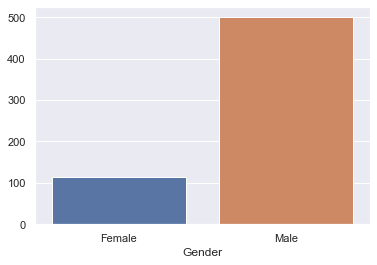

In [ ]:
print("Uniques in the data set {} ".format(df['Gender'].unique()))

#Filling the missing values in Gender
df['Gender'].fillna(method = 'ffill',inplace = True)
print("After filling the nan values {}".format(df['Gender'].unique()))


#Checking the count of each Loan_Status
p = df.groupby('Gender')['Gender'].count()
sns.barplot(x = p.index,y = p.values);

Most of the applicants are male as compared to Female

## Working with Married Status

Uniques in the dataset ['No' 'Yes' nan]
After replacing the nan values ['No' 'Yes']


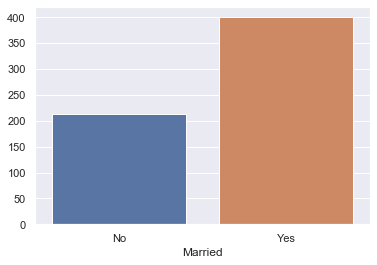

In [ ]:
print("Uniques in the dataset {}" .format(df['Married'].unique()))

#Filling the missing values in Married
df['Married'].fillna(method = 'ffill',inplace = True)
print("After replacing the nan values {}".format(df['Married'].unique()))


#Checking the count of Marraige Status
p = df.groupby('Married')['Married'].count()
sns.barplot(x = p.index,y = p.values);


Most of the applicants are Married

## Working with the dependents on the applicant

Unique values in dataset for dependents ['0' '1' '2' '3+' nan]
After removing nan values ['1' '0' '2' '3+']


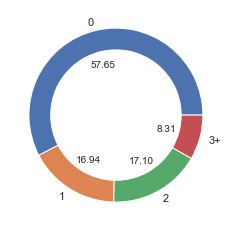

In [ ]:
print("Unique values in dataset for dependents {}".format(df['Dependents'].unique()))

#Filling the missing values in Married
df['Dependents'].fillna(method = 'ffill',inplace = True)
print("After removing nan values {}".format(train['Dependents'].unique()))

p = df.groupby('Dependents')['Dependents'].count()

plt.pie(p , labels = p.index , autopct = "%.2f" , wedgeprops = dict(width = 0.25))
plt.show()

There are 57.6% of applicants who have no  dependents.

There are 16.9% of applicants have 1 dependent.

There are 17.1% of applicants have 2 dependents.

There are 8.3% of applicants have more tha 3+ dependents.


## Educational Qualification

Uniques in the dataset depending upon education ['Graduate' 'Not Graduate']


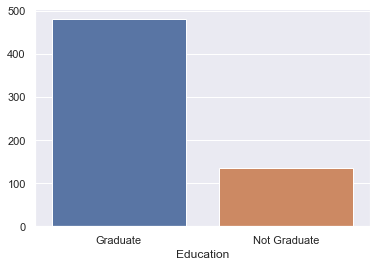

In [ ]:
print("Uniques in the dataset depending upon education {}".format(df['Education'].unique()))
p = df.groupby('Education')['Education'].count()
sns.barplot(x = p.index,y = p.values);

Most of the applicants are Graduate as compared to others

## Applicant is Self Employed or not

Number of uniques in the dataset depending upon Self_Employed or not ['No' 'Yes' nan]
After filling the nan values ['No' 'Yes']


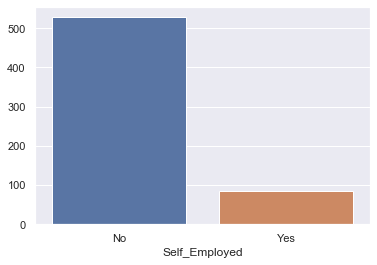

In [ ]:
print("Number of uniques in the dataset depending upon Self_Employed or not {}".format(df['Self_Employed'].unique()))

df['Self_Employed'].fillna(method = 'bfill',inplace = True)
print("After filling the nan values {}".format(df['Self_Employed'].unique()))

p = df.groupby('Self_Employed')['Self_Employed'].count()
sns.barplot(x = p.index,y = p.values);

Most of the people are not self employed. Exactly the same happens in real world most of the people are not self employed

## Working with Applicants Income

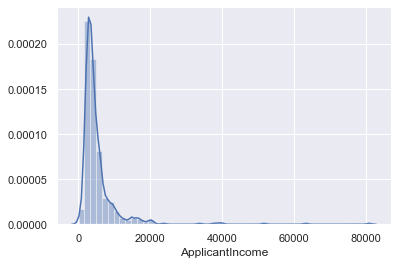

In [ ]:
sns.distplot(df['ApplicantIncome'],kde = True);

Right-Skewed DataSet

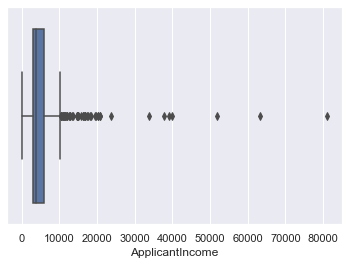

In [ ]:
sns.boxplot(df['ApplicantIncome']);

There are a lot of outliers in the data set.

In [ ]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

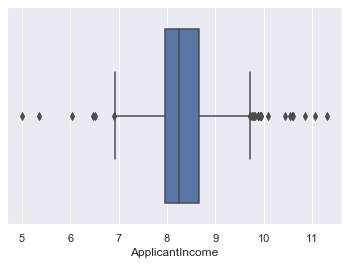

In [ ]:
sns.boxplot(np.log(df['ApplicantIncome']));

Now Dropping the outliers

In [ ]:
print(df['ApplicantIncome'].dtype)

int64


In [ ]:
#Removing Outliers Dependin upon quantile
max_threshold = df['ApplicantIncome'].quantile(0.85)
min_threshold = df['ApplicantIncome'].quantile(0.01)
df = df[(df['ApplicantIncome'] < max_threshold) & (df['ApplicantIncome'] > min_threshold)]
df.shape

(514, 13)

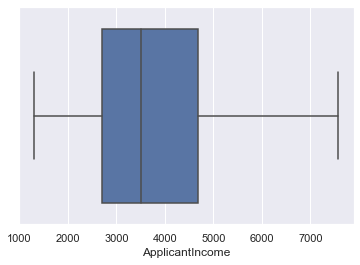

In [ ]:
sns.boxplot(df['ApplicantIncome']);

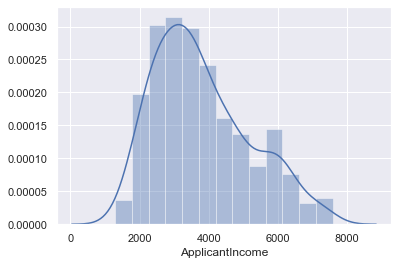

In [ ]:
sns.distplot(df['ApplicantIncome'],kde = True);

## Co apllicant income

In [ ]:
df['CoapplicantIncome'].isna().sum()

0

In [ ]:
df.groupby(train['CoapplicantIncome'])['CoapplicantIncome'].count()[0]

152

In real case also most of the co-applicants are housewives 
As most of the Co-Applicant Income is 0 so that leads to Outliers in the dataset. 

## Amount of Loan Required

In [ ]:
df['LoanAmount'].isna().sum()

19

In [ ]:
df = df[df['LoanAmount'] > 0 ]

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


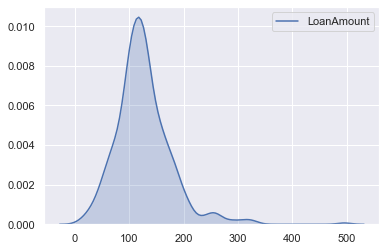

In [ ]:
sns.kdeplot(df['LoanAmount'],shade = True);

## Loan tenure 

Number of uniques in the data [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
After removing nan values [360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]
Loan_Amount_Term
1.0       1
3.0       2
5.0       2
7.0       4
10.0      3
15.0     32
20.0      3
25.0     10
30.0    425
40.0     13
Name: Loan_Amount_Term, dtype: int64


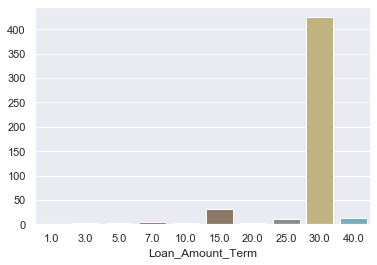

In [ ]:
print("Number of uniques in the data {}".format(df['Loan_Amount_Term'].unique()))

df['Loan_Amount_Term'].fillna(value = df['Loan_Amount_Term'].median(),inplace = True)
print("After removing nan values {}".format(df['Loan_Amount_Term'].unique()))

#Converting Loan_AMOUNT_Term from months to years
df['Loan_Amount_Term'] = df['Loan_Amount_Term']//12 


p = df.groupby('Loan_Amount_Term')['Loan_Amount_Term'].count()
sns.barplot(x= p.index , y = p.values);
print(p)

Most of the people like to take loan with large tenure.

## Credit History Of Applicant

Credit_History
0.0     81
1.0    414
Name: Credit_History, dtype: int64


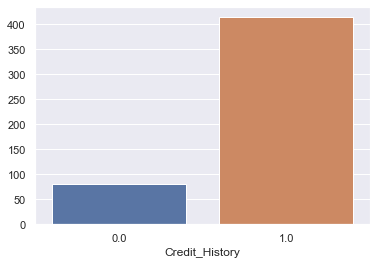

In [ ]:
df['Credit_History'].unique()


df['Credit_History'].fillna(method = 'ffill',inplace = True)
df['Credit_History'].unique()


p = df.groupby('Credit_History')['Credit_History'].count()
sns.barplot(x= p.index , y = p.values);
print(p)

A lot of people have a Good Credit History

## The Type of area for which the loan has been taken 

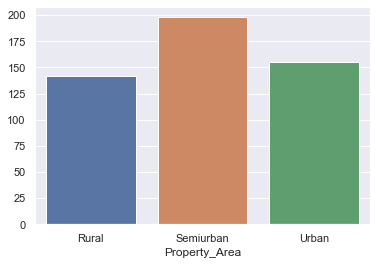

In [ ]:
df['Property_Area'].unique()


p = df.groupby('Property_Area')['Property_Area'].count()
sns.barplot(x= p.index , y = p.values);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              495 non-null object
Gender               495 non-null object
Married              495 non-null object
Dependents           495 non-null object
Education            495 non-null object
Self_Employed        495 non-null object
ApplicantIncome      495 non-null int64
CoapplicantIncome    495 non-null float64
LoanAmount           495 non-null float64
Loan_Amount_Term     495 non-null float64
Credit_History       495 non-null float64
Property_Area        495 non-null object
Loan_Status          495 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 54.1+ KB


## Loan Status of applicants

Unique values in the column for Loan_Status ['N' 'Y']
30.505050505050505
69.4949494949495


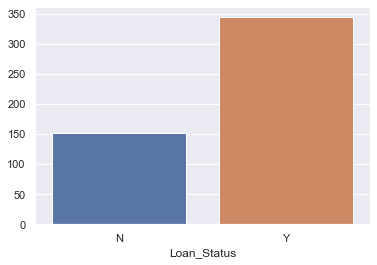

In [ ]:
print("Unique values in the column for Loan_Status {}".format(df['Loan_Status'].unique()))

p = df.groupby('Loan_Status')['Loan_Status'].count()
sns.barplot(x = p.index , y = p.values);

p_total = sum(p.values)
for value in p.values:
    print(value * 100 / p_total)

There is roughly 70:30 ratio of getting the loan approved. 

## Income of Male as compared to Female

In [ ]:
df.groupby('Gender')['ApplicantIncome'].median()

Gender
Female    3422.5
Male      3547.0
Name: ApplicantIncome, dtype: float64

In [ ]:
df.groupby('Gender')['ApplicantIncome'].mean()

Gender
Female    3559.106383
Male      3844.381546
Name: ApplicantIncome, dtype: float64

Male Applicants have an higher income as compared to female apllicants

## Depending upon gender who has higher ratio of getting loan

In [ ]:
df.groupby(['Gender', 'Loan_Status'])['Loan_Status'].count()

Gender  Loan_Status
Female  N               32
        Y               62
Male    N              119
        Y              282
Name: Loan_Status, dtype: int64

We can clearly see Male ratio of getting loan approved is approx 1.75:1

where as female ratio of getting loan approved if approx 2.25:1

## Credit history depending upon gender

In [ ]:
df.groupby(['Gender', 'Credit_History'])['Credit_History'].count()

Gender  Credit_History
Female  0.0                16
        1.0                78
Male    0.0                65
        1.0               336
Name: Credit_History, dtype: int64

Both of them seems to have equal credit history

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,30.0,1.0,Urban,Y


In [ ]:
df.Loan_Status.replace({'Y': 0, 'N': 1}, inplace= True)
df.Education.replace({'Graduate': 0, 'Not Graduate': 1}, inplace= True)
df.Self_Employed.replace({'Yes': 0, 'No': 1}, inplace= True)
df.Gender.replace({'Male': 0, 'Female': 1}, inplace= True)
df.Married.replace({'Yes': 0, 'No': 1}, inplace= True)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,30.0,1.0,Rural,1
2,LP001005,0,0,0,0,0,3000,0.0,66.0,30.0,1.0,Urban,0
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,30.0,1.0,Urban,0
4,LP001008,0,1,0,0,1,6000,0.0,141.0,30.0,1.0,Urban,0
5,LP001011,0,0,2,0,0,5417,4196.0,267.0,30.0,1.0,Urban,0


In [ ]:
df.drop('Loan_ID',axis = 1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 1 to 613
Data columns (total 12 columns):
Gender               495 non-null int64
Married              495 non-null int64
Dependents           495 non-null object
Education            495 non-null int64
Self_Employed        495 non-null int64
ApplicantIncome      495 non-null int64
CoapplicantIncome    495 non-null float64
LoanAmount           495 non-null float64
Loan_Amount_Term     495 non-null float64
Credit_History       495 non-null float64
Property_Area        495 non-null object
Loan_Status          495 non-null int64
dtypes: float64(4), int64(6), object(2)
memory usage: 50.3+ KB


In [ ]:
dep = pd.get_dummies(df['Dependents'])
lat = pd.get_dummies(df['Loan_Amount_Term'])
pa = pd.get_dummies(df['Property_Area'])

In [ ]:
df = pd.concat([df ,dep ,lat ,pa],axis = 1)

In [ ]:
df = df.drop(['Dependents' ,'Loan_Amount_Term','Property_Area'],axis = 1)

In [ ]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,0,...,7.0,10.0,15.0,20.0,25.0,30.0,40.0,Rural,Semiurban,Urban
1,0,0,0,1,4583,1508.0,128.0,1.0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,3000,0.0,66.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0,0,1,1,2583,2358.0,120.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,1,0,1,6000,0.0,141.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,1
5,0,0,0,0,5417,4196.0,267.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 1 to 613
Data columns (total 26 columns):
Gender               495 non-null int64
Married              495 non-null int64
Education            495 non-null int64
Self_Employed        495 non-null int64
ApplicantIncome      495 non-null int64
CoapplicantIncome    495 non-null float64
LoanAmount           495 non-null float64
Credit_History       495 non-null float64
Loan_Status          495 non-null int64
0                    495 non-null uint8
1                    495 non-null uint8
2                    495 non-null uint8
3+                   495 non-null uint8
1.0                  495 non-null uint8
3.0                  495 non-null uint8
5.0                  495 non-null uint8
7.0                  495 non-null uint8
10.0                 495 non-null uint8
15.0                 495 non-null uint8
20.0                 495 non-null uint8
25.0                 495 non-null uint8
30.0                 495 non-null uint8
40.0     

# Modelling

In [ ]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
df[['ApplicantIncome', 'CoapplicantIncome' ,'LoanAmount']] = Standardisation.fit_transform(dff[['ApplicantIncome', 'CoapplicantIncome' ,'LoanAmount']])

In [ ]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,0,...,7.0,10.0,15.0,20.0,25.0,30.0,40.0,Rural,Semiurban,Urban
1,0,0,0,1,0.580707,-0.059731,0.026080,1.0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,-0.578814,-0.658963,-1.182978,1.0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0,0,1,1,-0.884259,0.278033,-0.129927,1.0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,1,0,1,1.618635,-0.658963,0.279592,1.0,0,1,...,0,0,0,0,0,1,0,0,0,1
5,0,0,0,0,1.191597,1.008398,2.736710,1.0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
y = df['Loan_Status']
X = df.drop('Loan_Status',axis = 1)

In [ ]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y)

In [ ]:
print("X_TRAIN {} , Y_TRAIN {} , X_TEST {} , Y_TEST {}".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

X_TRAIN (371, 25) , Y_TRAIN (371,) , X_TEST (124, 25) , Y_TEST (124,)


## Logistic Regression

In [ ]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)


print(confusion_matrix(y_test , y_pred))
print(accuracy_score(y_test , y_pred))

[[84  1]
 [16 23]]
0.8629032258064516


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Decision Tree

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

0.7903225806451613
[[68 17]
 [ 9 30]]


## RandomForest

In [ ]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

0.8548387096774194
[[82  3]
 [15 24]]


Logistic Regression Helped us to achieve the best Classification